In [1]:
from sklearn.model_selection import GridSearchCV
from keras.api._v2 import keras
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
import tensorflow as tf

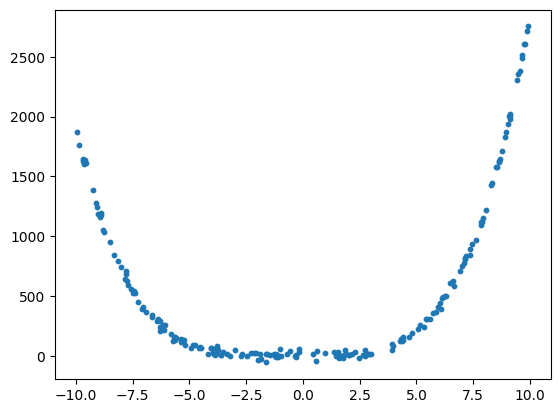

In [2]:
def generate_dataset(n, order = 3):
    # B is beta, n is number of sample
    B = (np.random.rand(order+1)-0.5)
    X = np.random.uniform(-10, 10, (n))
    y = 0
    for i in range(len(B)):
        y += B[i] * np.power(X, i)
    e = np.random.normal(0, 25, n)
    y += e
    return X, y

def plot_dataset(X, y):
    #m = np.random.uniform(0.3, 0.5, (n, ))    # not sure why you need this
    #b = np.random.uniform(5, 10, (n, ))    # not sure why you need this

    plt.scatter(X, y, s=10)
    plt.show()

n = 500
X, y = generate_dataset(200, 4)
plot_dataset(X, y)

In [3]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
def make_model(degree):
    print("Making model with degree %d" %degree)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = 5, input_dim = degree, activation='relu'),
        tf.keras.layers.Dense(units = 1, activation = 'linear')
    ], name=f'model_degree-{degree}')
    model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=1e-2, ))
    return model

pipeline = Pipeline([
    ('pf', PolynomialFeatures(include_bias=False)),
    ('nn', KerasRegressor(build_fn = make_model, epochs = 100))    
])

C:\Users\osman\AppData\Local\Temp\ipykernel_16308\2797735595.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('nn', KerasRegressor(build_fn = make_model, epochs = 100))


In [6]:
param_grid = [
    {'pf__degree': [i], 'nn__degree': [i]} for i in range(1, 11)
]
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Making model with degree 1
Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 752406.0625
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 751523.7500
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 750724.6250
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 749939.1875
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 749048.8750
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 748203.8750
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 747396.4375
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 746479.3750
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 745633.1250
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 744717.5000
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 743714.3125
Epoch 12/100
4/4 [==============================] - 0s 2ms

c:\Users\osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Users\osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_

5/5 [==============================] - 0s 2ms/step - loss: 7936317.0000
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 5915526.0000
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 4619347.0000
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 3520182.5000
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 2711294.0000
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 2187869.5000
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 1762374.6250
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 1462258.1250
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 1302567.0000
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 1166094.5000
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 1065486.3750
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 1007723.6250
E

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pf',
                                        PolynomialFeatures(include_bias=False)),
                                       ('nn',
                                        <keras.wrappers.scikit_learn.KerasRegressor object at 0x000001D261FC7E80>)]),
             param_grid=[{'nn__degree': [1], 'pf__degree': [1]},
                         {'nn__degree': [2], 'pf__degree': [2]},
                         {'nn__degree': [3], 'pf__degree': [3]},
                         {'nn__degree': [4], 'pf__degree': [4]},
                         {'nn__degree': [5], 'pf__degree': [5]},
                         {'nn__degree': [6], 'pf__degree': [6]},
                         {'nn__degree': [7], 'pf__degree': [7]},
                         {'nn__degree': [8], 'pf__degree': [8]},
                         {'nn__degree': [9], 'pf__degree': [9]},
                         {'nn__degree': [10], 'pf__degree': [10]}],
             scoring='neg_mean_squared_error')

In [7]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'nn__degree': 4, 'pf__degree': 4}
Best score:  -606.7901540764323


We find the best model to be of degree 4 after exhaustive grid search

In [8]:
pipeline.set_params(nn__degree = 4, pf__degree = 4, nn__epochs = 500)

Pipeline(steps=[('pf', PolynomialFeatures(degree=4, include_bias=False)),
                ('nn',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x000001D261FC7E80>)])

In [9]:
pipeline.fit(X_train, y_train)

Making model with degree 4
Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 13836024.0000
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 9985874.0000
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 7165874.5000
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 5149563.5000
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 3288358.5000
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 2099119.5000
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 1183131.2500
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 628652.3125
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 267770.8750
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 110906.5781
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 36076.3945
Epoch 12/500
5/5 [==============================] -

Pipeline(steps=[('pf', PolynomialFeatures(degree=4, include_bias=False)),
                ('nn',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x000001D261FC7E80>)])

In [10]:
print("Final MSE score on test set:", -pipeline.score(X_test, y_test))

2/2 [==============================] - 0s 2ms/step - loss: 728.7829
Final MSE score on test set: 728.7828979492188
